In [31]:
# Dependencies
import base64
import requests
import json
from config import api_key
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import time

In [32]:
sal_path = "TotPayroll.csv"
sal_df = pd.read_csv(sal_path)

In [33]:
sal_df

,Team Name,Team Name.1,TeamYear,Roster,25-Man Payroll,IR,Retained,Buried,Suspended,Total Payroll,Year
0,Boston Red Sox,Red Sox,Red Sox2019,39,202597500,-,19000000,-,-,221042500,2019
1,Chicago Cubs,Cubs,Cubs2019,40,206825714,575000,-,-,3400000,210800714,2019
2,New York Yankees,Yankees,Yankees2019,40,196146071,-,2000000,-,-,198146071,2019
3,Los Angeles Dodgers,Dodgers,Dodgers2019,40,148660002,-,39116666,5000000,-,192776668,2019
4,Los Angeles Angels,Angels,Angels2019,39,164949999,1901000,500000,-,-,167350999,2019
5,San Francisco Giants,Giants,Giants2019,40,143592777,21000000,-,`,-,164592777,2019
6,New York Mets,Mets,Mets2019,40,142556666,-,15000000,-,-,157556666,2019
7,Washington Nationals,Nationals,Nationals2019,40,157455561,-,-,-,-,157455561,2019
8,St. Louis Cardinals,Cardinals,Cardinals2019,40,151001666,-,5000000,-,-,156001666,2019
9,Houston Astros,Astros,Astros2019,39,152522500,-,500000,-,-,153022500,2019


In [25]:
#set url
#url to current standings
#https://api.sportradar.us/mlb-{access_level}{version}/seasontd/{season_year}/{mlb_season}/standings.{format}?api_key={your_api_key}


# access_level = "t" 
# version = 6
# season_year = 2012
# mlb_season = "REG"
# format = "json" 
# your_api_key = api_key
# mlb_stand_url = f"https://api.sportradar.us/mlb-{access_level}{version}/seasontd/{season_year}/{mlb_season}/standings.{format}?api_key={your_api_key}"
# #check url

# #set url 2 to league depth chart
# #https://api.sportradar.us/mlb-{access_level}{version}/teams/{team_id}/depth_chart.{format}?api_key={your_api_key}
# access_level2 = "t"
# version2 = 6
# format2 = "json"
# your_api_key2 = api_key
# mlb_leaguedepth_url = f"https://api.sportradar.us/mlb-{access_level2}{version2}/league/depth_charts.{format2}?api_key={your_api_key2}"

#MULTI YEAR

access_level = "t" 
version = 6
mlb_season = "REG"
format = "json" 
your_api_key = api_key
mlb_stand_url = f"https://api.sportradar.us/mlb-{access_level}{version}/seasontd/{season_year}/{mlb_season}/standings.{format}?api_key={your_api_key}"
#check url

In [35]:
# #Current Standings Try/Exception trial:
# try:
#     response = requests.get(
#         url=mlb_stand_url)
#     print('Response HTTP Status Code: {status_code}'.format(status_code=response.status_code))
#     #print('Response HTTP Response Body: {content}'.format(content=response.content))
# except requests.exceptions.RequestException:
#     print('HTTP Request failed')
years = [2013,2014,2015,2016,2017,2018]
access_level = "t" 
version = 6
mlb_season = "REG"
format = "json" 
your_api_key = api_key
all_mlb = []
for year in years:
    response = requests.get(
        url=f"https://api.sportradar.us/mlb-{access_level}{version}/seasontd/{year}/{mlb_season}/standings.{format}?api_key={your_api_key}"
    )
    response = response.json()
    all_mlb.append(response)
    time.sleep(1)

In [21]:
#turn into json
#all_mlb[0]

In [46]:
#Current Standings Try/Exception trial:
#response

In [22]:
# #Trial 2
# try:
#     response2 = requests.get(
#         url=mlb_leaguedepth_url)
#     print('Response HTTP Status Code: {status_code}'.format(status_code=response2.status_code))
#     #print('Response HTTP Response Body: {content}'.format(content=response2.content))
# except requests.exceptions.RequestException:
#     print('HTTP Request failed')

Response HTTP Status Code: 200


In [47]:
#response2 = response2.json()
#response2

In [36]:
#Call each side
#response['league']['season']['leagues'][0] -> west
#response['league']['season']['leagues'][1] -> east
#response['league']['season']['leagues'][0]['divisions'][0]['teams'][0]['name'] -> first team in east
team_names = []
win_ratio = []
mlb_year = []
#loop through east/west
for w in range(0,len(all_mlb)):
    for z in range(0,len(all_mlb[w]['league']['season']['leagues'])):
        #loop through division
        for y in range(0,len(all_mlb[w]['league']['season']['leagues'][z]['divisions'])):
            #loop through each team
            for x in range(0,len(all_mlb[w]['league']['season']['leagues'][z]['divisions'][y]['teams'])):
                team_names.append(all_mlb[w]['league']['season']['leagues'][z]['divisions'][y]['teams'][x]['name'])
                win_ratio.append(all_mlb[w]['league']['season']['leagues'][z]['divisions'][y]['teams'][x]['win_p'])
                mlb_year.append(all_mlb[w]['league']['season']['year'])


In [38]:
#response['league']['season']['leagues'][0]

In [42]:
mlb_df = pd.DataFrame({
    "Team Name": team_names,
    "Win Ratio": win_ratio,
    "MLB Year": mlb_year
})
mlb_df["TeamYear"] = mlb_df["Team Name"] + mlb_df["MLB Year"].map(str)
mlb_df = mlb_df[["TeamYear","Team Name", "Win Ratio", "MLB Year"]]
mlb_df.head(180)

,TeamYear,Team Name,Win Ratio,MLB Year
0,Dodgers2013,Dodgers,0.568,2013
1,Diamondbacks2013,Diamondbacks,0.500,2013
2,Giants2013,Giants,0.469,2013
3,Padres2013,Padres,0.469,2013
4,Rockies2013,Rockies,0.457,2013
5,Cardinals2013,Cardinals,0.599,2013
6,Pirates2013,Pirates,0.580,2013
7,Reds2013,Reds,0.556,2013
8,Brewers2013,Brewers,0.457,2013
9,Cubs2013,Cubs,0.407,2013


In [43]:
merged_df = pd.merge(mlb_df, sal_df, on ="TeamYear")

In [44]:
sort_mlb = merged_df.sort_values(["Win Ratio"],ascending=[False])
sort_mlb

,TeamYear,Team Name_x,Win Ratio,MLB Year,Team Name_y,Team Name.1,Roster,25-Man Payroll,IR,Retained,Buried,Suspended,Total Payroll,Year
165,Red Sox2018,Red Sox,0.667,2018,Boston Red Sox,Red Sox,36,167955780,18074000,41755860,2180000,-,227398860,2018
120,Dodgers2017,Dodgers,0.642,2017,Los Angeles Dodgers,Dodgers,39,184284091,22654516,41492656,11675000,-,259119625,2017
95,Cubs2016,Cubs,0.640,2016,Chicago Cubs,Cubs,36,161378832,2050500,19412586,3230000,-,184352494,2016
175,Astros2018,Astros,0.636,2018,Houston Astros,Astros,36,158520510,556400,4027264,2189400,-,163524216,2018
140,Indians2017,Indians,0.630,2017,Cleveland Indians,Indians,39,115772319,6129713,10007205,1070000,-,131958928,2017
145,Astros2017,Astros,0.623,2017,Houston Astros,Astros,40,132536382,835843,3284838,2535000,-,138709677,2017
166,Yankees2018,Yankees,0.617,2018,New York Yankees,Yankees,38,148010829,22568376,9249414,3130000,-,180098151,2018
65,Cardinals2015,Cardinals,0.617,2015,St. Louis Cardinals,Cardinals,38,128814787,3195000,-,3552500,-,132178951,2015
55,Angels2014,Angels,0.605,2014,Los Angeles Angels of Anaheim,Angels,41,132451972,-,32051279,900000,-,165403251,2014
66,Pirates2015,Pirates,0.605,2015,Pittsburgh Pirates,Pirates,33,81904030,14318868,2759768,3548000,-,99435606,2015


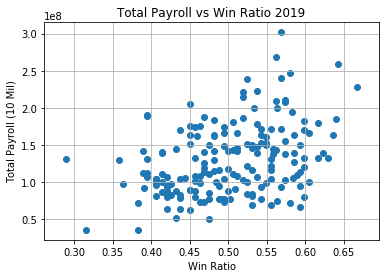

In [45]:
plt.scatter(sort_mlb["Win Ratio"],sort_mlb["Total Payroll"])
plt.xlabel("Win Ratio")
plt.ylabel("Total Payroll (10 Mil)")
plt.title("Total Payroll vs Win Ratio 2019")
plt.grid()
plt.savefig("PayrollvsWinRatio2019.png")

In [46]:
#look for population standard deviation
mlb_win_mean = sort_mlb["Win Ratio"].mean()
sort_mlb["DevCalcOne"] = sort_mlb["Win Ratio"] - mlb_win_mean
sort_mlb["DevCalcTwo"] = sort_mlb["DevCalcOne"] * sort_mlb["DevCalcOne"]
mlb_win_var = sort_mlb["DevCalcTwo"].mean()
mlb_win_dev = math.sqrt(mlb_win_var)
mlb_win_dev

0.07065105937887996

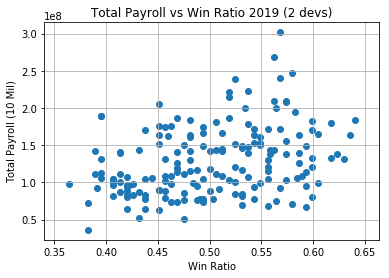

In [47]:
twodev_win_df = sort_mlb.loc[(sort_mlb["Win Ratio"] <= mlb_win_mean + 2 * mlb_win_dev) & (sort_mlb["Win Ratio"] >= mlb_win_mean - 2 * mlb_win_dev),:]
plt.scatter(twodev_win_df["Win Ratio"],twodev_win_df["Total Payroll"])
plt.xlabel("Win Ratio")
plt.ylabel("Total Payroll (10 Mil)")
plt.title("Total Payroll vs Win Ratio 2019 (2 devs)")
plt.grid()
#slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
#line = slope*xi+intercept
plt.savefig("PayrollvsWinRatio2Devs2019.png")

In [50]:
# #Playoff Incorporation
# #https://api.sportradar.us/mlb-{access_level}{version}/series/{season_year}/{mlb_season}/schedule.{format}?api_key={your_api_key}
# #years = [2013,2014,2015,2016,2017,2018]
# years = [2013,2014,2015,2016,2017,2018]
# access_level = "t" 
# version = 6
# mlb_season = "PST"
# format = "json" 
# your_api_key = api_key
# po_mlb = []
# for season_year in years:
#     response = requests.get(
#         url=f"https://api.sportradar.us/mlb-{access_level}{version}/series/{season_year}/{mlb_season}/schedule.{format}?api_key={your_api_key}"
#     )
#     response = response.json()
#     po_mlb.append(response)
#     time.sleep(1)
#unfortunately post season only goes up to 2016...
#po_mlb[3]

In [ ]:
#playoff test 2
